In [50]:
import pandas as pd

In [51]:
train_set = pd.read_csv('..\\dataset\\train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
test_set = pd.read_csv('..\\dataset\\test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
women = train_set.loc[train_set.Sex =='female']['Survived']
survived_women_rate = sum(women)/len(women)
print('% of women survived: ', survived_women_rate)

% of women survived:  0.7420382165605095


In [55]:
men = train_set.loc[train_set.Sex =='male']['Survived']
survived_men_rate = sum(men)/len(men)
print('% of men survived: ', survived_men_rate)

% of men survived:  0.18890814558058924


<AxesSubplot:xlabel='Sex'>

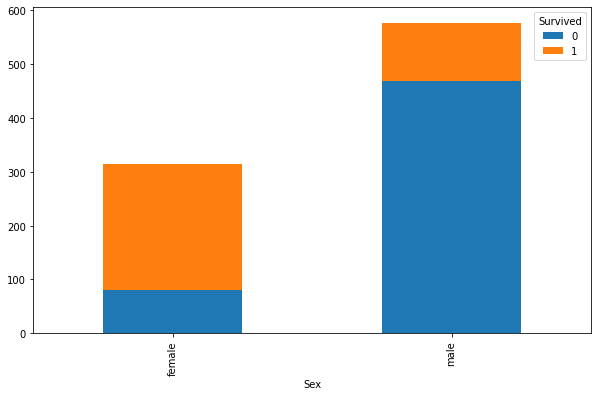

In [74]:
import matplotlib.pyplot as plt
train_set.groupby("Sex")["Survived"].value_counts().unstack().plot(kind = "bar", stacked = True, figsize = (10,6))

In [56]:
y = train_set[['Survived']]
features = ['Sex', 'SibSp', 'Parch', 'Pclass']


In [57]:
X = pd.get_dummies(train_set[features])
X.head()

,SibSp,Parch,Pclass,Sex_female,Sex_male
0,1,0,3,0,1
1,1,0,1,1,0
2,0,0,3,1,0
3,1,0,1,1,0
4,0,0,3,0,1


In [58]:
X_test = pd.get_dummies(test_set[features])
X_test.head()

,SibSp,Parch,Pclass,Sex_female,Sex_male
0,0,0,3,0,1
1,1,0,3,1,0
2,0,0,2,0,1
3,0,0,3,0,1
4,1,1,3,1,0


In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Sex': test_set.Sex, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

C:\Users\guido\AppData\Local\Temp\ipykernel_13320\3769877737.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


In [76]:
result = pd.read_csv('submission.csv')
result.head()

,PassengerId,Sex,Survived
0,892,male,0
1,893,female,1
2,894,male,0
3,895,male,0
4,896,female,1


<AxesSubplot:xlabel='Sex'>

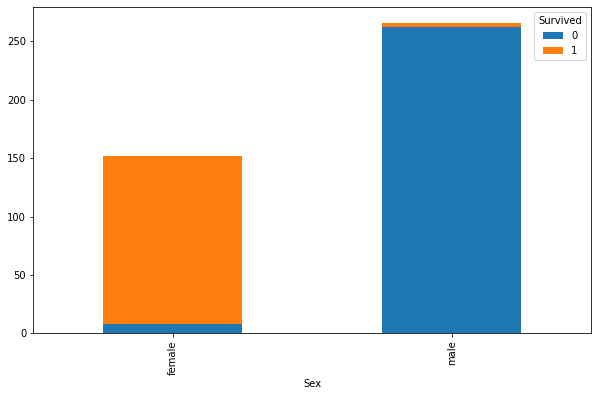

In [77]:
import matplotlib.pyplot as plt
result.groupby("Sex")["Survived"].value_counts().unstack().plot(kind = "bar", stacked = True, figsize = (10,6))